In [151]:
#PIMA DAIBETES
#importing the necessay libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [152]:
df = pd.read_csv('diabetes.csv')
df.info()
df1=df.copy()
df2=df.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [153]:
df1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [154]:
df1[['Pregnancies','Glucose','BMI','Age']]

df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [155]:
df1.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

<AxesSubplot:>

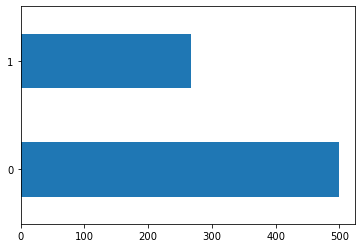

In [156]:
df1["Outcome"].value_counts().plot(kind="barh")

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

<AxesSubplot:>

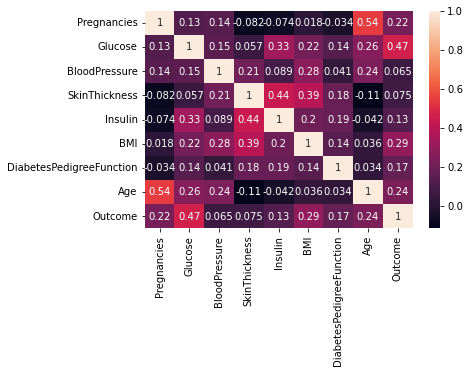

In [157]:
corr= df1.corr()
print(corr)
sns.heatmap(corr,annot=True,
            xticklabels=corr.columns,
            yticklabels=corr.columns)

In [158]:
x= df1[['Pregnancies','Glucose','BMI','Age']]
y = df1['Outcome']
log =lm.LogisticRegression()
Random =RandomForestClassifier()
models =[log,Random]
print(x)


     Pregnancies  Glucose   BMI  Age
0              6      148  33.6   50
1              1       85  26.6   31
2              8      183  23.3   32
3              1       89  28.1   21
4              0      137  43.1   33
..           ...      ...   ...  ...
763           10      101  32.9   63
764            2      122  36.8   27
765            5      121  26.2   30
766            1      126  30.1   47
767            1       93  30.4   23

[768 rows x 4 columns]


In [163]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)
for model in models:
  model.fit(x_train,y_train)
  predictions= model.predict(x_test)
  accuracy = f1_score(y_test,predictions)
  print(f'This {model} has an accuracy of {accuracy}')

This LogisticRegression() has an accuracy of 0.6481481481481481
This RandomForestClassifier() has an accuracy of 0.6545454545454545


In [160]:
import joblib
joblib.dump(Random,'random_model.pkl')

['random_model.pkl']

In [161]:
x_test.iloc[45]
#df1.loc[45]


Pregnancies      3.0
Glucose        158.0
BMI             31.6
Age             28.0
Name: 31, dtype: float64

In [162]:
''''k=df1[df1["Glucose"]<50]
m =df1[df1["Insulin"]<3]
df1.drop(k.index,inplace=True)
df1.drop(m.index,inplace=True)
df1[df1["Age"]==0].value_counts().sum()'''

KeyError: '[ 62  75 342 349 502] not found in axis'

<AxesSubplot:xlabel='Glucose'>

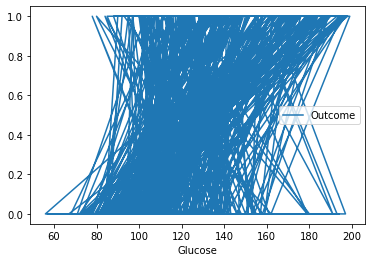

In [172]:
df1.plot("Glucose","Outcome")